In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import scipy as sp
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

In [2]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../../Data/BaseData.csv')
base.shape

(2580, 299)

### MLR With SFS (n=3) ###

In [3]:
from sklearn.feature_selection import SequentialFeatureSelector

In [4]:
y=base.SalePrice
X=base.drop('SalePrice', axis=1)

In [5]:
multiple = LinearRegression()

In [6]:
sfs_foreward = SequentialFeatureSelector(
    multiple, n_features_to_select=3, direction="forward"
).fit(X, y)

In [7]:
selected = X.columns[sfs_foreward.get_support()]
selected

Index(['GrLivArea', 'OverallQual', 'BsmtFinSF1'], dtype='object')

In [8]:
X = base[selected]
X.head(3)

,GrLivArea,OverallQual,BsmtFinSF1
0,856,6,238.0
1,1049,5,552.0
2,1001,5,737.0


In [9]:
multiple.fit(X,y)

LinearRegression()

In [10]:
multiple.score(X,y)

0.799003771440033

In [19]:
multiple.coef_

array([   61.37071314, 27201.76655691,    45.27108839])

In [11]:
X = base[selected]
y = base.SalePrice.values.reshape(-1,1)

In [12]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [13]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [14]:
MLR3 = evaluate_model(multiple, X,y)
MLR3

,fit_time,score_time,test_r2,test_neg_mae
0,0.011586,0.003672,0.788923,-24591.073190
1,0.003553,0.001082,0.770726,-23266.878826
2,0.008137,0.001333,0.798058,-23693.414321
3,0.003533,0.001262,0.803587,-23045.244618
4,0.007543,0.001348,0.825722,-22969.414066
5,0.004246,0.001281,0.793776,-25015.789837
6,0.003640,0.001176,0.832232,-21900.209103
7,0.002942,0.000847,0.794146,-23548.826345
8,0.006943,0.002853,0.809997,-23406.779269
9,0.002706,0.001092,0.768348,-23705.689598


In [15]:
MLR3 = MLR3.assign(MAE = MLR3['test_neg_mae'].abs())
MLR3 = MLR3.rename(columns = {'test_r2':'MLR3 R2', 'MAE':'MLR3 MAE'})
MLR3

,fit_time,score_time,MLR3 R2,test_neg_mae,MLR3 MAE
0,0.011586,0.003672,0.788923,-24591.073190,24591.073190
1,0.003553,0.001082,0.770726,-23266.878826,23266.878826
2,0.008137,0.001333,0.798058,-23693.414321,23693.414321
3,0.003533,0.001262,0.803587,-23045.244618,23045.244618
4,0.007543,0.001348,0.825722,-22969.414066,22969.414066
5,0.004246,0.001281,0.793776,-25015.789837,25015.789837
6,0.003640,0.001176,0.832232,-21900.209103,21900.209103
7,0.002942,0.000847,0.794146,-23548.826345,23548.826345
8,0.006943,0.002853,0.809997,-23406.779269,23406.779269
9,0.002706,0.001092,0.768348,-23705.689598,23705.689598


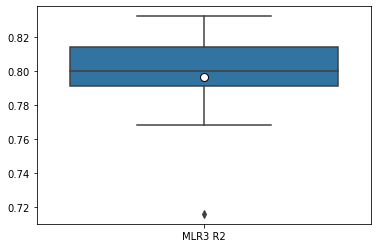

In [16]:
sns.boxplot(data=MLR3[['MLR3 R2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [17]:
MLR3.describe()

,fit_time,score_time,MLR3 R2,test_neg_mae,MLR3 MAE
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.005542,0.002028,0.796327,-23545.705089,23545.705089
std,0.002534,0.001102,0.028576,934.821179,934.821179
min,0.002559,0.000847,0.716231,-25147.224707,21900.209103
25%,0.003543,0.001193,0.791349,-24121.103635,23007.329342
50%,0.005984,0.001333,0.799815,-23406.779269,23406.779269
75%,0.006856,0.003100,0.814016,-23007.329342,24121.103635
max,0.011586,0.003789,0.832232,-21900.209103,25147.224707


In [20]:
MLR3.to_csv('MLR3.csv', index=False)

In [ ]:
simple.fit(X,y)
response = simple.predict(X)
r2 = simple.score(X,y)

In [ ]:
r2

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.625')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Overall Quality', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Overall Quality vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()